# Explore here

In [50]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np

load_dotenv()

client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")

In [51]:
fla_uri = 'spotify:artist:5QYAExYvxixCVwX70SRf7F'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(fla_uri)

In [52]:
song_list = []
for track_info in results['tracks'][:10]:
    track = track_info['name']
    duration = track_info['duration_ms']/60000
    popularity = track_info['popularity']
    song_list.append([track, duration, popularity])
    

In [53]:
columns = ['Track name', 'Duration (min)', 'Popularity']
df = pd.DataFrame(song_list, columns = columns)

df

,Track name,Duration (min),Popularity
0,Deadened,5.800000,37
1,Killing Grounds,5.975333,35
2,Rock Me Amadeus,4.246883,33
3,Mindphaser,6.741100,31
4,Millennium,6.163333,28
5,Force Carrier,3.352100,27
6,Mechvirus - Remix,4.903217,27
7,Vigilante,6.474433,27
8,Angriff,6.722667,23
9,Plasticity (Album Version),6.816433,24


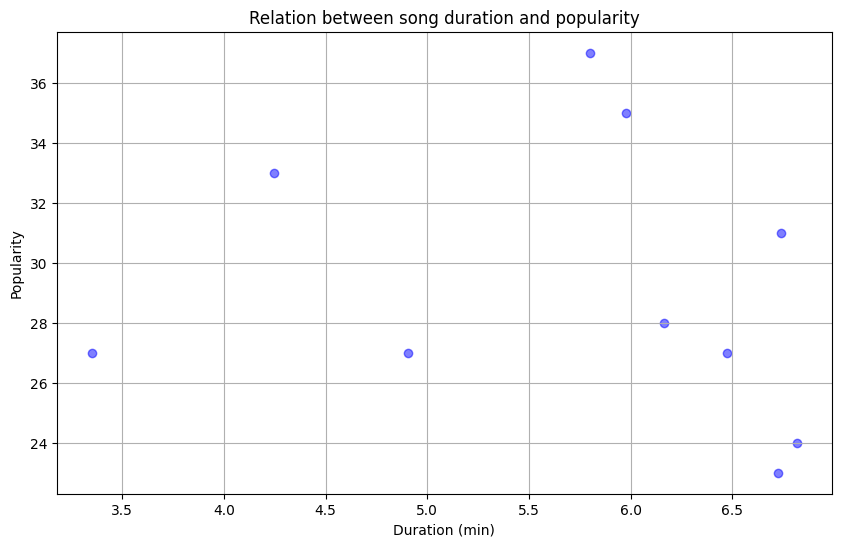

In [55]:
import matplotlib.pyplot as plt

# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (min)'], df['Popularity'], color='blue', alpha=0.5)
plt.title('Relation between song duration and popularity')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

Con base en lo que se puede observar en el grafico, la relación entre duracion y popularidad es directamente proporcional; si bien tanto canciones cortas como largas tienen prescencia en una buena posición de popularidad, mas canciones de mayor duración ocupan puestos en esta lista y en mejores posiciones que las canciones cortas. Hace falta un analisis mas detallado para confirmar la teoria de relacion.